# Where to open a Mexican restaurant in Melbourne?

Ernesto Cangas Compean

In [98]:
#Libraries instalation 
!pip install geopy    
!pip install folium   
!pip install geocoder
!pip install pywaffle

In [3]:
#Import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap


from bs4 import BeautifulSoup 
import pandas as pd
import requests
from pywaffle import Waffle

print('Libraries imported.')

Libraries imported.


In [183]:
#Initial file extraction

xlsx_path = '/Users/ernestocangascompean/Documents/To/Personal/IBM_Data_Science_Certificate/MelbourneRestaurantAnalysis/Melbourne_suburbs_population.xlsx'
df = pd.read_excel(xlsx_path)
df

,Suburb,Population,Area (Km2),Latitude,Longitude
0,Carlton,18535,1.80,-37.800100,144.967100
1,Carlton North,6300,1.90,-37.784000,144.969000
2,Docklands,10964,3.00,-37.817000,144.946000
3,East Melbourne,4964,1.90,-37.813000,144.985000
4,Flemington,7719,1.20,-37.785000,144.928000
5,Kensington,10812,3.90,-37.791000,144.931000
6,Melbourne CBD,47285,1.79,-37.814000,144.963000
7,North Melbourne,14940,2.40,-37.799167,144.946667
8,Port Melbourne,16175,9.70,-37.823889,144.911111
9,Parkville,7409,4.00,-37.788000,144.951000


In [185]:
#Get suburb and population data

df_population=df.loc[:,'Suburb':'Population']
df_population

,Suburb,Population
0,Carlton,18535
1,Carlton North,6300
2,Docklands,10964
3,East Melbourne,4964
4,Flemington,7719
5,Kensington,10812
6,Melbourne CBD,47285
7,North Melbourne,14940
8,Port Melbourne,16175
9,Parkville,7409


In [186]:
df_population

,Suburb,Population
0,Carlton,18535
1,Carlton North,6300
2,Docklands,10964
3,East Melbourne,4964
4,Flemington,7719
5,Kensington,10812
6,Melbourne CBD,47285
7,North Melbourne,14940
8,Port Melbourne,16175
9,Parkville,7409


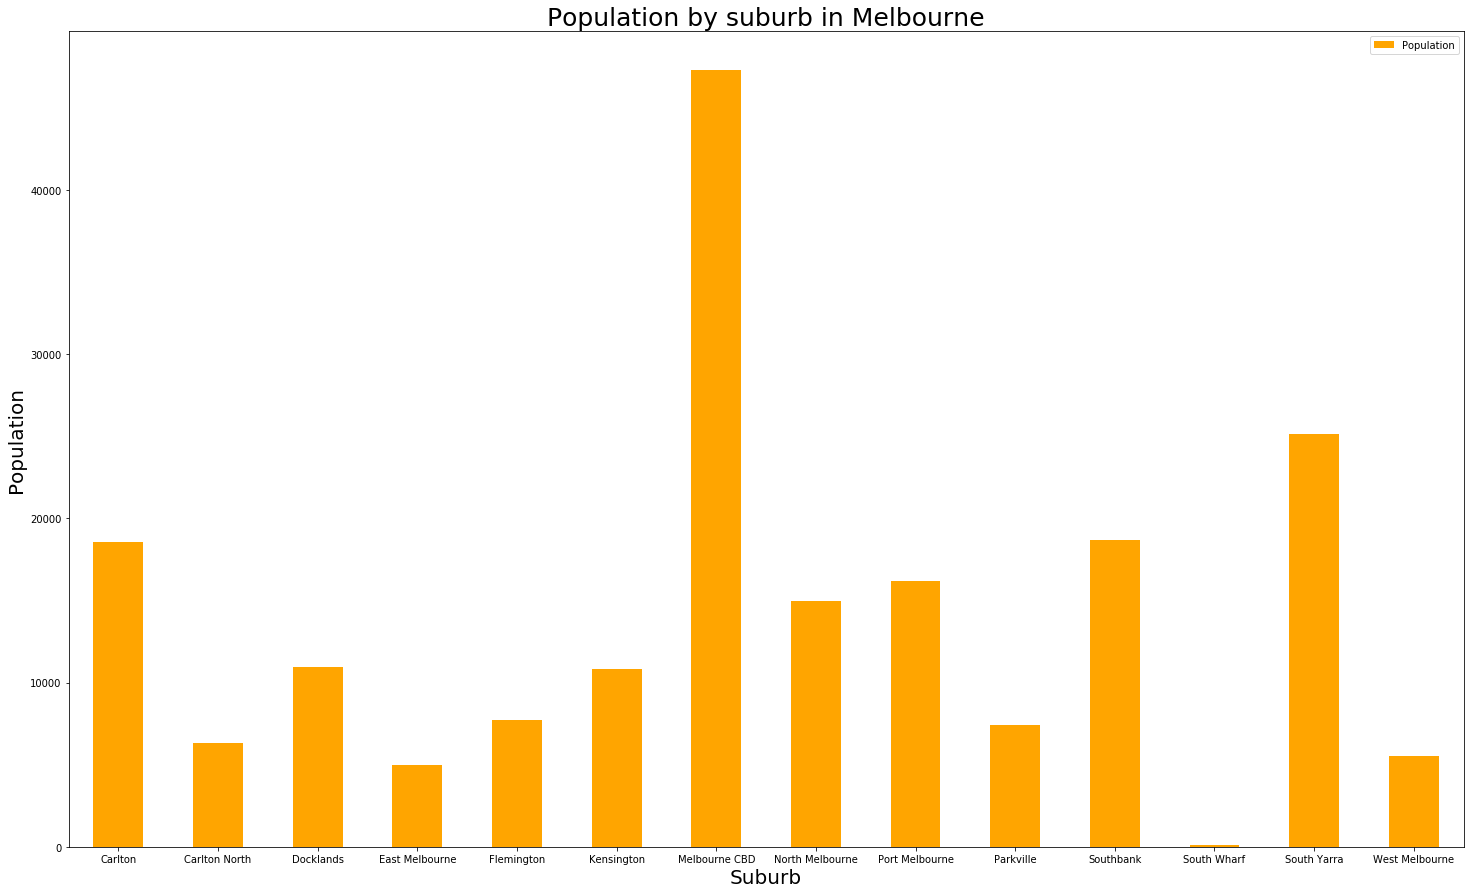

In [7]:
# Bar Plot data

df_population.plot.bar(x='Suburb', y='Population', figsize=(25, 15), color=['orange'], rot=0)

plt.xlabel('Suburb', fontsize=20) # add to x-label to the plot
plt.ylabel('Population', fontsize=20) # add y-label to the plot
plt.title('Population by suburb in Melbourne', fontsize=25) # add title to the plot

plt.show()


In [188]:
#Get coordinates of Melbourne

melbourne_adress = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="melbourne_find")
location = geolocator.geocode(melbourne_adress)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinates of {} are {}, {}.'.format(melbourne_adress, latitude, longitude))

The geograpical coordinates of Melbourne, Australia are -37.8142176, 144.9631608.


In [193]:
#Map the suburbs 

map_melbourne = folium.Map(location=[latitude,longitude],zoom_start=13)

for lat,lng,suburb in zip(df['Latitude'],df['Longitude'],df['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)
map_melbourne

In [72]:
#Foursquare Credentials

CLIENT_ID = '4EMYQCABRB5B5TGRPGHCNC4TJJFGNCE2URVRZMINWCD22XIQ' # your Foursquare ID
CLIENT_SECRET = 'OCOWMJVCTSW2CV2TFTDM55ORVLA2UTIAEHDQWVHRVZ5QBZWP' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4EMYQCABRB5B5TGRPGHCNC4TJJFGNCE2URVRZMINWCD22XIQ
CLIENT_SECRET:OCOWMJVCTSW2CV2TFTDM55ORVLA2UTIAEHDQWVHRVZ5QBZWP


In [17]:
#Get Suburb Venues

LIMIT = 100

def getNeighborhoodVenues(latitude, longitude,suburb, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,suburb):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Suburb', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df['Latitude'], df['Longitude'], df['Suburb'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 202 unique venue categories. Some of them are as below:


,Suburb,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Carlton,-37.8001,144.9671,Pidapipó Gelateria,52b3f5cc498eb8a07c6efe3c,-37.798300,144.967060,200,Ice Cream Shop
1,Carlton,-37.8001,144.9671,Carlton Wine Room,4de1faa0c65b7a3e21100fd3,-37.798584,144.968610,214,Wine Bar
2,Carlton,-37.8001,144.9671,Yo-Chi,52b00cef498e7b6a43b26fcc,-37.798659,144.967849,173,Frozen Yogurt Shop
3,Carlton,-37.8001,144.9671,Gewürzhaus,4c19d901fe5a76b0453a0415,-37.799050,144.967480,121,Gourmet Shop
4,Carlton,-37.8001,144.9671,Readings,4b164c60f964a52015b823e3,-37.797971,144.967405,238,Bookstore


In [12]:
neighborhood_venues

,Suburb,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Carlton,-37.8001,144.9671,Pidapipó Gelateria,52b3f5cc498eb8a07c6efe3c,-37.798300,144.967060,200,Ice Cream Shop
1,Carlton,-37.8001,144.9671,Carlton Wine Room,4de1faa0c65b7a3e21100fd3,-37.798584,144.968610,214,Wine Bar
2,Carlton,-37.8001,144.9671,Yo-Chi,52b00cef498e7b6a43b26fcc,-37.798659,144.967849,173,Frozen Yogurt Shop
3,Carlton,-37.8001,144.9671,Gewürzhaus,4c19d901fe5a76b0453a0415,-37.799050,144.967480,121,Gourmet Shop
4,Carlton,-37.8001,144.9671,Readings,4b164c60f964a52015b823e3,-37.797971,144.967405,238,Bookstore
...,...,...,...,...,...,...,...,...,...
1058,West Melbourne,-37.8080,144.9270,Chef Lanka,4ebe45800e019a162a0c066e,-37.810973,144.920998,623,Asian Restaurant
1059,West Melbourne,-37.8080,144.9270,Henke Rink,4fc1c5d8e4b09af80b4104c4,-37.811957,144.936345,932,Hockey Arena
1060,West Melbourne,-37.8080,144.9270,Old Man Pho,578ee4c5498e9c268cbb28c7,-37.811380,144.937090,963,Vietnamese Restaurant
1061,West Melbourne,-37.8080,144.9270,Hoyts The District Docklands,5c15b458ccad6b00392417c6,-37.812056,144.936898,980,Movie Theater


In [306]:
#Top 10 venues

print('Top 10 distinct venue counts are:')
df_dsn=neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:11]

df_dsn

Top 10 distinct venue counts are:


,Count
VenueCategory,
Café,137
Bar,41
Coffee Shop,36
Italian Restaurant,29
Japanese Restaurant,22
Thai Restaurant,20
Pub,19
Hotel,18
Bakery,17


In [298]:
#Add cafe duplicate into one row

df_dsn.loc['Café'] += df_dsn.loc['Coffee Shop']
df_dsn.drop(['Coffee Shop'], inplace=True)
df_dsn.reset_index(inplace = True) 
df_dsn

,VenueCategory,Count
0,Café,173
1,Bar,41
2,Italian Restaurant,29
3,Japanese Restaurant,22
4,Thai Restaurant,20
5,Pub,19
6,Hotel,18
7,Bakery,17
8,Pizza Place,15
9,Burger Joint,15


In [299]:
#Convert dataframe to dictionary for plots

x=df_dsn.set_index('VenueCategory')['Count'].to_dict()
x

{'Café': 173,
 'Bar': 41,
 'Italian Restaurant': 29,
 'Japanese Restaurant': 22,
 'Thai Restaurant': 20,
 'Pub': 19,
 'Hotel': 18,
 'Bakery': 17,
 'Pizza Place': 15,
 'Burger Joint': 15}

Here is a  waffle chart of the top 10 restaurant types in Melbourne:


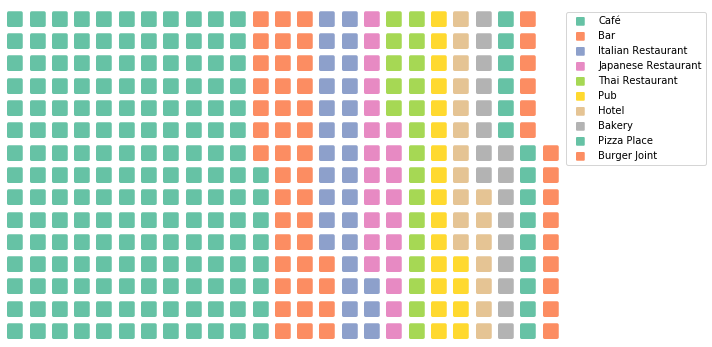

In [300]:
#Waffle chart of top 10 restaurant types

print('Here is a  waffle chart of the top 10 restaurant types in Melbourne:')

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    values=x, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='square', icon_size=18, 
    icon_legend=True,
    figsize= (10,10)
)

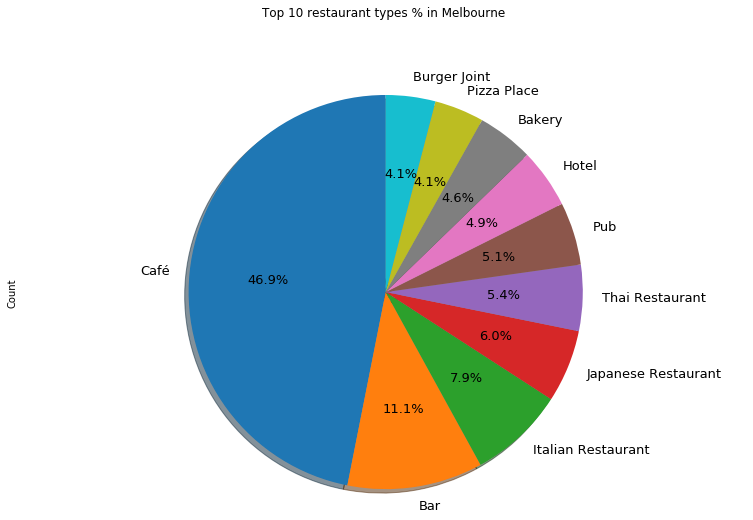

In [301]:
#Pie chart of the top 10 restaurants


df_dsn['Count'].plot(kind='pie',
                            figsize=(13, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=df_dsn['VenueCategory'],fontsize=13,         # turn off labels on pie chart
                                # the ratio between the center of each pie slice and the start of the text generated by autopct
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 10 restaurant types % in Melbourne', y=1.12) 

plt.axis('equal') 



plt.show()

In [58]:
#Obtaining the names of the Mexican restaurants

melbourneMexicanRestaurants=mexican_restaurants[['Suburb','VenueName','VenueId','VenueLatitude', 'VenueLongitude', 'VenueCategory']]
melbourneMexicanRestaurants = melbourneMexicanRestaurants.drop_duplicates('VenueLatitude')
melbourneMexicanRestaurants.style.hide_index()

Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory
Flemington,La Tortillería,50e6949ee4b010cf8fac2a0a,-37.7914,144.935,Mexican Restaurant
Melbourne CBD,Guzman y Gomez,507e1c68e4b04a2c7cc62bb9,-37.8112,144.964,Mexican Restaurant
North Melbourne,El Sabor,5204b98a498ea5d6a6f4e5e0,-37.805,144.95,Mexican Restaurant
Port Melbourne,El Cielo,50cbea53e4b0bc9a5153b150,-37.8265,144.921,Mexican Restaurant
Southbank,Paco y Lola,518c6473498e951b557f79d4,-37.8317,144.957,Mexican Restaurant
Southbank,MadMex,53fafceb498e31b96ac65cdb,-37.8321,144.96,Mexican Restaurant
South Yarra,Guzman Y Gomez,56b93973498e9571740f55d1,-37.8393,144.993,Burrito Place
South Yarra,Zambrero,51049db1e4b01dd7f97b3bac,-37.8462,144.994,Mexican Restaurant
South Yarra,Hecho En Mexico,589c0de101f077670ab8bd49,-37.8433,144.995,Mexican Restaurant


In [27]:
#Obtain the % of Mexican Restaurants

restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place', 'Burrito Place']
mexican_restaurant_list = ['Mexican Restaurant', 'Burrito Place']

neighborhood_venues['Restaurant']=False
for restCat in restaurant_list:
    neighborhood_venues['Restaurant'] = neighborhood_venues['Restaurant'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['Restaurant'] == True].iloc[:,:-1]
mexican_restaurants = neighborhood_restaurants[neighborhood_restaurants['VenueCategory'].isin(mexican_restaurant_list)]
other_restaurants = neighborhood_restaurants[~neighborhood_restaurants['VenueCategory'].isin(mexican_restaurant_list)]


number_restaurants=len(neighborhood_restaurants['VenueId'].unique())
number_mexican_restaurants=len(mexican_restaurants['VenueId'].unique())


percentage_mexican=(number_mexican_restaurants/number_restaurants)*100

MexicanTable = pd.DataFrame({'Total Restaurants': number_restaurants, 'Mexican Restaurants': number_mexican_restaurants, '% of Mexican': percentage_mexican}, index=[0])
MexicanTable.style.hide_index()


Total Restaurants,Mexican Restaurants,% of Mexican
391,9,2.30179


In [236]:
#Map the Mexican Restaurants

print("The Location of the Mexican Restaurants in Melbourne:")
map_melbourne_mexican = folium.Map(location=[-37.85,144.96],zoom_start=12.3)

for lat,lng,VenueName in zip(melbourneMexicanRestaurants['VenueLatitude'],melbourneMexicanRestaurants['VenueLongitude'],melbourneMexicanRestaurants['VenueName']):
    label = '{}'.format(VenueName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne_mexican)
map_melbourne_mexican

The Location of the Mexican Restaurants in Melbourne:


In [29]:
#Count of Mexican restaurants by suburb

Mexicancountbysuburb=melbourneMexicanRestaurants[['Suburb','VenueCategory']].groupby('Suburb').count().rename(columns={"VenueCategory": "Count of Mexican Restaurants"})
Mexicancountbysuburb.reset_index(inplace = True)
Mexicancountbysuburb

,Suburb,Count of Mexican Restaurants
0,Flemington,1
1,Melbourne CBD,1
2,North Melbourne,1
3,Port Melbourne,1
4,South Yarra,3
5,Southbank,2


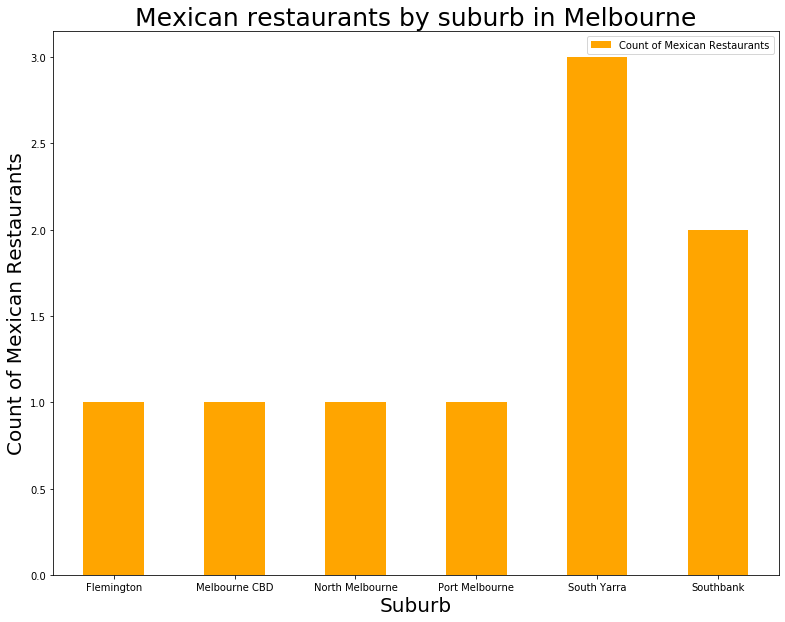

In [22]:
# Plot Mexican restaurants by suburb

Mexicancountbysuburb.plot.bar(x='Suburb', y='Count of Mexican Restaurants', figsize=(13, 10), color=['orange'], rot=0)

plt.xlabel('Suburb', fontsize=20) # add to x-label to the plot
plt.ylabel('Count of Mexican Restaurants', fontsize=20) # add y-label to the plot
plt.title('Mexican restaurants by suburb in Melbourne', fontsize=25) # add title to the plot

plt.show()



In [238]:
#Heat map of the Mexican Restaurants in Melbourne

print("The Heat Map of the Mexican Restaurants in Melbourne:")
m = folium.Map([-37.85,144.96],zoom_start=12.3)

for index, row in melbourneMexicanRestaurants.iterrows():
    folium.CircleMarker([row['VenueLatitude'], row['VenueLongitude']],
                        radius=15,
                        popup=row['VenueName'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

stationArr = melbourneMexicanRestaurants[['VenueLatitude', 'VenueLongitude']].to_numpy()
to=stationArr.tolist()

m.add_child(plugins.HeatMap(to, radius=15))
m

The Heat Map of the Mexican Restaurants in Melbourne:


In [30]:
#Recall suburb latitudes and longitudes

MexrestaurantStats = pd.merge(Mexicancountbysuburb, df, how='left')
MexrestaurantStats

,Suburb,Count of Mexican Restaurants,Population,Area (Km2),Latitude,Longitude
0,Flemington,1,7719,1.20,-37.785000,144.928000
1,Melbourne CBD,1,47285,1.79,-37.814000,144.963000
2,North Melbourne,1,14940,2.40,-37.799167,144.946667
3,Port Melbourne,1,16175,9.70,-37.823889,144.911111
4,South Yarra,3,25147,5.00,-37.840000,144.989000
5,Southbank,2,18709,1.70,-37.829000,144.957000


In [31]:
#Obtain the Mexican restaurants/Km2 and Mexican restaurants/100 habitants

MexrestaurantStats['RestaurantsMexicans/Km2'] = MexrestaurantStats['Count of Mexican Restaurants']/MexrestaurantStats['Area (Km2)']
MexrestaurantStats['RestaurantsMexicans/100 habitants'] = 100*MexrestaurantStats['Count of Mexican Restaurants']/MexrestaurantStats['Population']
MexrestaurantStats.drop(['Latitude','Longitude'], axis = 1)

,Suburb,Count of Mexican Restaurants,Population,Area (Km2),RestaurantsMexicans/Km2,RestaurantsMexicans/100 habitants
0,Flemington,1,7719,1.20,0.833333,0.012955
1,Melbourne CBD,1,47285,1.79,0.558659,0.002115
2,North Melbourne,1,14940,2.40,0.416667,0.006693
3,Port Melbourne,1,16175,9.70,0.103093,0.006182
4,South Yarra,3,25147,5.00,0.600000,0.011930
5,Southbank,2,18709,1.70,1.176471,0.010690


In [32]:
#Reduce the whole venues data frame

melbourneRestaurants=neighborhood_restaurants[['Suburb','VenueName','VenueId','VenueLatitude', 'VenueLongitude', 'VenueCategory']]
melbourneRestaurants = melbourneRestaurants.drop_duplicates('VenueId')
melbourneRestaurants.style.hide_index()

Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory
Carlton,D.O.C. Pizza & Mozzarella Bar,4b0b8439f964a520053223e3,-37.799,144.968,Pizza Place
Carlton,Shakahari,4b05874cf964a520dd8922e3,-37.7989,144.968,Vegetarian / Vegan Restaurant
Carlton,D.O.C Espresso,50f52847e4b0c40b56fa5110,-37.7992,144.967,Italian Restaurant
Carlton,Le Miel et la lune,4f541dc2e4b050039f73094c,-37.797,144.966,Café
Carlton,Donnini's Restaurant,4ba9fd41f964a520f4413ae3,-37.7995,144.967,Italian Restaurant
Carlton,Brunetti,4b2cc0bff964a52006c924e3,-37.7981,144.968,Café
Carlton,Colourful Yunnan,4fc73238e4b0da556a752ede,-37.8005,144.964,Yunnan Restaurant
Carlton,New York Minute,557d95ed498e73fbf1d8cae9,-37.7988,144.966,Burger Joint
Carlton,Papa Gino's,4b1dbb11f964a520851424e3,-37.8002,144.967,Italian Restaurant
Carlton,Leyalina,54df0908498e6c6790b7ba53,-37.8011,144.966,Egyptian Restaurant


In [33]:
#Count of restaurants by suburb by category

MelbourneRestType=melbourneRestaurants.groupby(['Suburb','VenueCategory'],as_index=False).count().rename(columns={"VenueName": "Count of restaurants"})
MelbourneRestType=MelbourneRestType[['Suburb','VenueCategory','Count of restaurants']]
MelbourneRestType


,Suburb,VenueCategory,Count of restaurants
0,Carlton,Asian Restaurant,1
1,Carlton,Australian Restaurant,1
2,Carlton,Burger Joint,2
3,Carlton,Café,12
4,Carlton,Egyptian Restaurant,1
...,...,...,...
167,Southbank,Seafood Restaurant,2
168,Southbank,Thai Restaurant,1
169,Southbank,Turkish Restaurant,1
170,West Melbourne,Asian Restaurant,1


In [240]:
#Group the suburbs and venuecategories count

melbourneRestaurants.groupby(['Suburb'])['VenueCategory'].value_counts()


Suburb          VenueCategory                
Carlton         Café                             12
                Italian Restaurant                8
                Vegetarian / Vegan Restaurant     3
                Burger Joint                      2
                Japanese Restaurant               2
                                                 ..
Southbank       Restaurant                        1
                Thai Restaurant                   1
                Turkish Restaurant                1
West Melbourne  Asian Restaurant                  1
                Fast Food Restaurant              1
Name: VenueCategory, Length: 172, dtype: int64

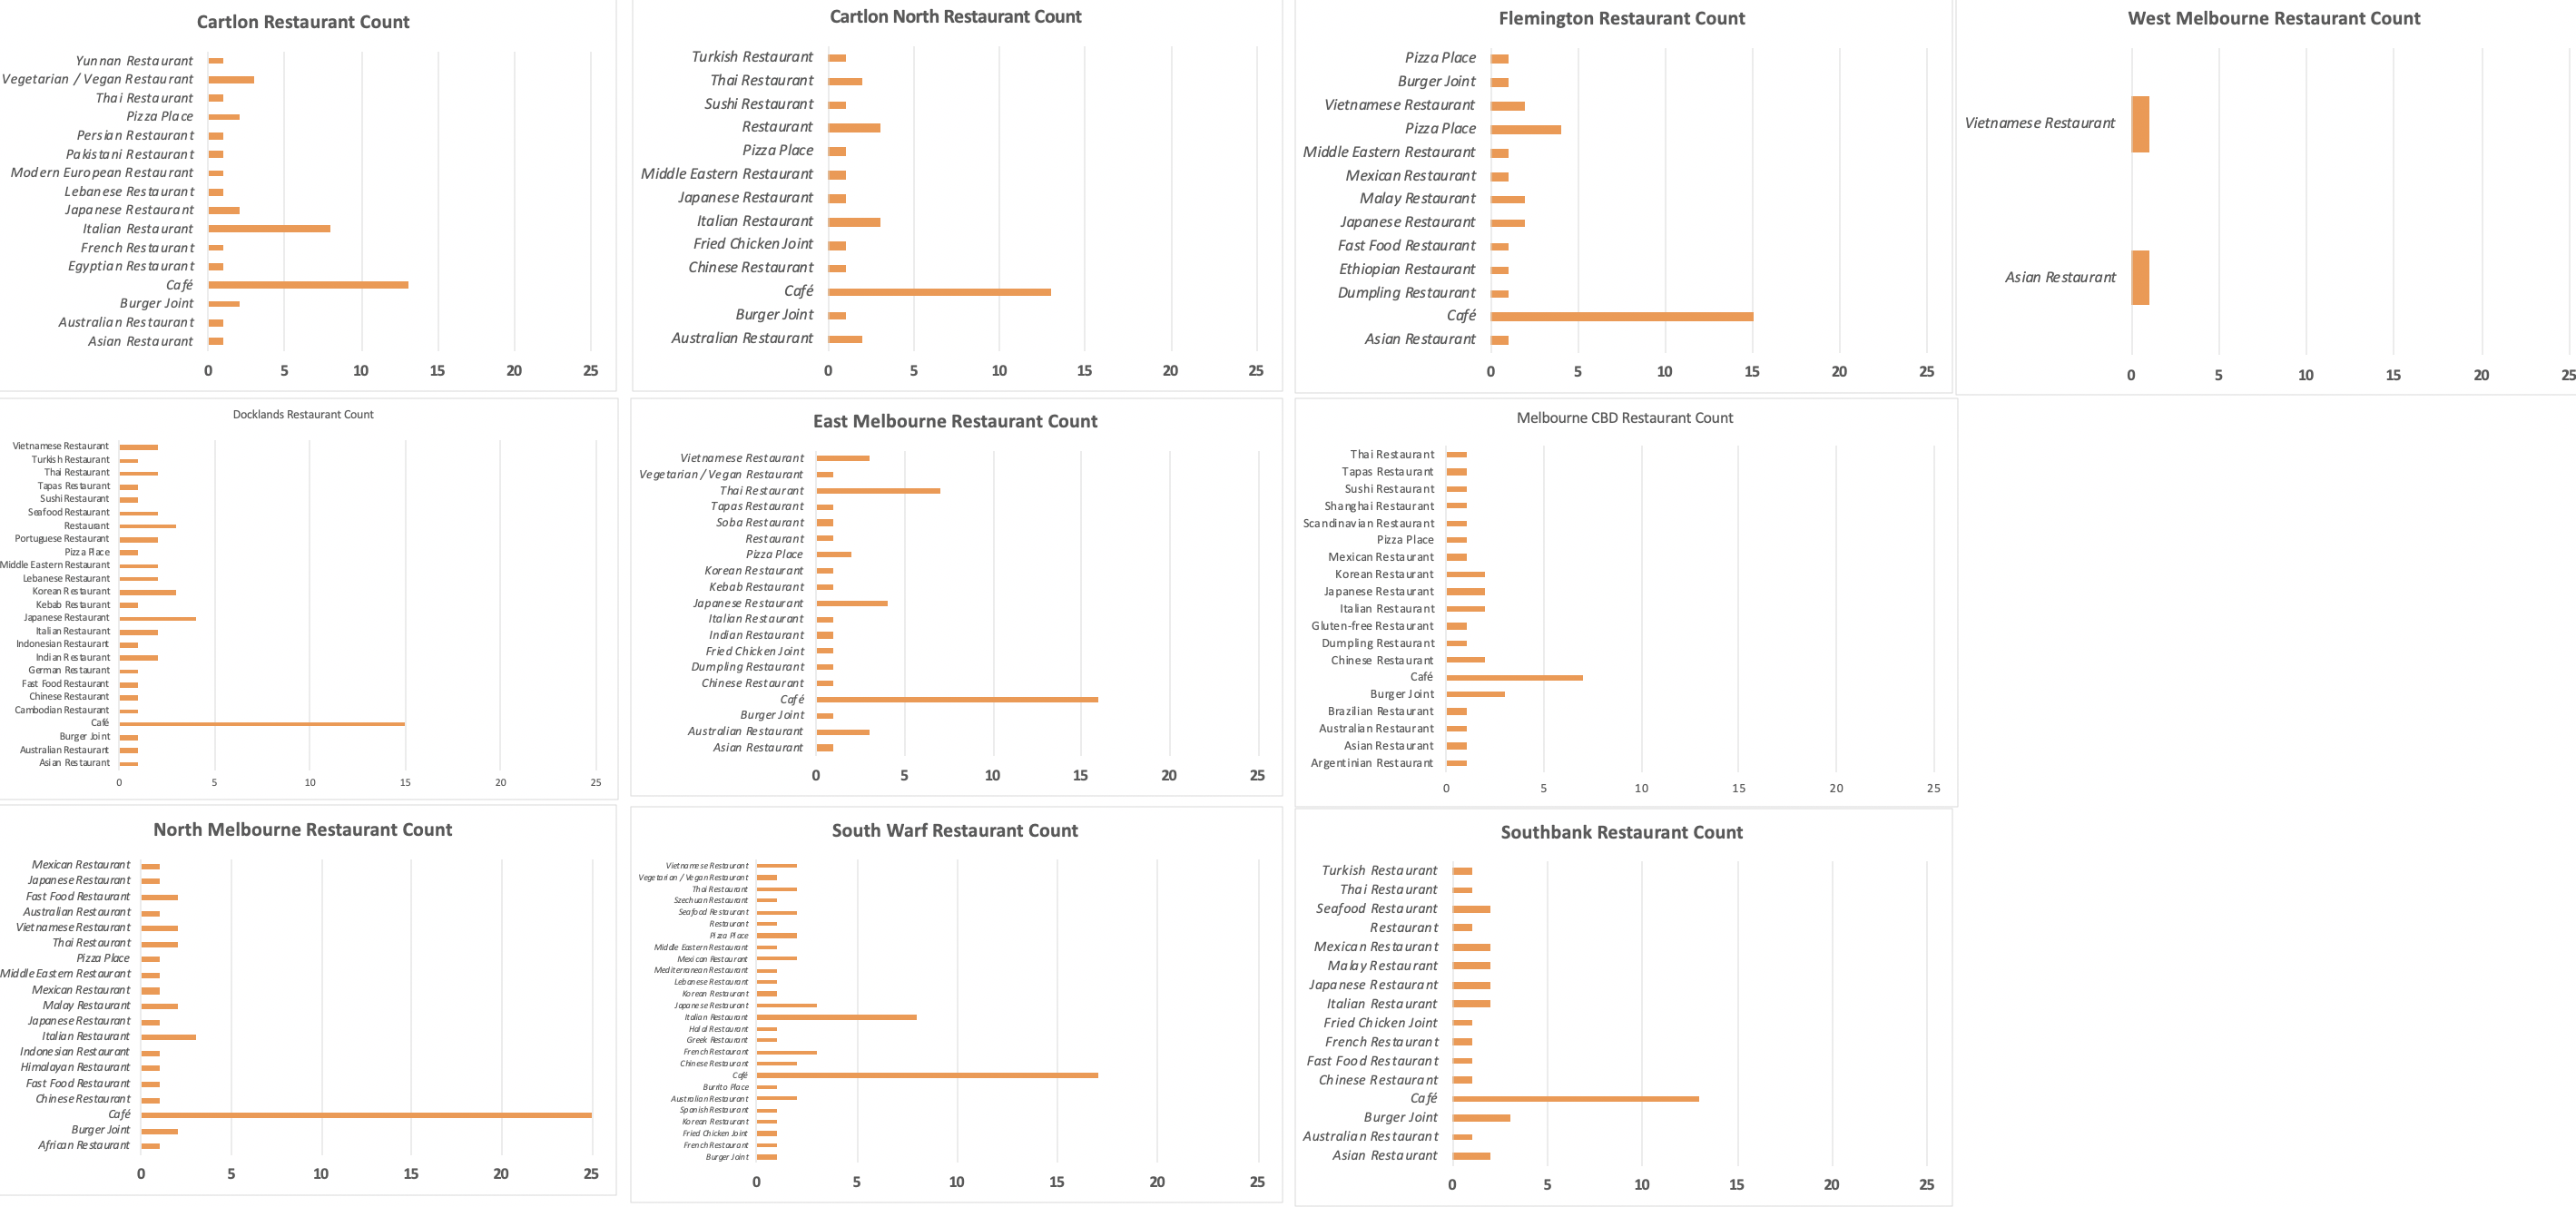

In [27]:
#Analysis of Restaurants by Suburb made with tableu from the groupby of the previous cell
from IPython.display import Image
Image("/Users/ernestocangascompean/Documents/To/Personal/IBM_Data_Science_Certificate/MelbourneRestaurantAnalysis/Melbourne_Restaurant_Distribution_BySuburb.png")

In [34]:
#Merge the venues with the original dataframe

restaurantTypeStats = pd.merge(MelbourneRestType, df, how='left')
restaurantTypeStats

,Suburb,VenueCategory,Count of restaurants,Population,Area (Km2),Latitude,Longitude
0,Carlton,Asian Restaurant,1,18535,1.8,-37.8001,144.9671
1,Carlton,Australian Restaurant,1,18535,1.8,-37.8001,144.9671
2,Carlton,Burger Joint,2,18535,1.8,-37.8001,144.9671
3,Carlton,Café,12,18535,1.8,-37.8001,144.9671
4,Carlton,Egyptian Restaurant,1,18535,1.8,-37.8001,144.9671
...,...,...,...,...,...,...,...
167,Southbank,Seafood Restaurant,2,18709,1.7,-37.8290,144.9570
168,Southbank,Thai Restaurant,1,18709,1.7,-37.8290,144.9570
169,Southbank,Turkish Restaurant,1,18709,1.7,-37.8290,144.9570
170,West Melbourne,Asian Restaurant,1,5515,6.4,-37.8080,144.9270


In [35]:
#Count restaurants by suburb

RestaurantCount=melbourneRestaurants.groupby('Suburb').count()[['VenueCategory']].rename(columns={"VenueCategory": "Count of Restaurants"})
RestaurantCount.reset_index(inplace = True)
RestaurantCount


,Suburb,Count of Restaurants
0,Carlton,39
1,Carlton North,31
2,Docklands,54
3,East Melbourne,48
4,Flemington,25
5,Kensington,10
6,Melbourne CBD,31
7,North Melbourne,43
8,Port Melbourne,11
9,South Wharf,6


In [36]:
#Add the columns: restaurants/Km2 and restaurants/100 habitants

restaurantStats = pd.merge(RestaurantCount, df, how='left')
restaurantStats['Restaurants/Km2'] = restaurantStats['Count of Restaurants']/restaurantStats['Area (Km2)']
restaurantStats['Restaurants/100 habitants'] = 100*restaurantStats['Count of Restaurants']/restaurantStats['Population']
restaurantStats.drop(['Latitude','Longitude'], axis = 1)

,Suburb,Count of Restaurants,Population,Area (Km2),Restaurants/Km2,Restaurants/100 habitants
0,Carlton,39,18535,1.80,21.666667,0.210413
1,Carlton North,31,6300,1.90,16.315789,0.492063
2,Docklands,54,10964,3.00,18.000000,0.492521
3,East Melbourne,48,4964,1.90,25.263158,0.966962
4,Flemington,25,7719,1.20,20.833333,0.323876
5,Kensington,10,10812,3.90,2.564103,0.092490
6,Melbourne CBD,31,47285,1.79,17.318436,0.065560
7,North Melbourne,43,14940,2.40,17.916667,0.287818
8,Port Melbourne,11,16175,9.70,1.134021,0.068006
9,South Wharf,6,106,0.25,24.000000,5.660377


In [38]:
#Merge and format

final = pd.merge(restaurantStats, MexrestaurantStats, how='left')

final['Count of Mexican Restaurants'].replace(np.nan,0,inplace=True)
final['RestaurantsMexicans/Km2'].replace(np.nan,0,inplace=True)
final['RestaurantsMexicans/100 habitants'].replace(np.nan,0,inplace=True)
final['Count of Mexican Restaurants'] = final['Count of Mexican Restaurants'].astype(np.int64)
final.drop(['Latitude','Longitude'], axis = 1, inplace=True)
final


,Suburb,Count of Restaurants,Population,Area (Km2),Restaurants/Km2,Restaurants/100 habitants,Count of Mexican Restaurants,RestaurantsMexicans/Km2,RestaurantsMexicans/100 habitants
0,Carlton,39,18535,1.80,21.666667,0.210413,0,0.000000,0.000000
1,Carlton North,31,6300,1.90,16.315789,0.492063,0,0.000000,0.000000
2,Docklands,54,10964,3.00,18.000000,0.492521,0,0.000000,0.000000
3,East Melbourne,48,4964,1.90,25.263158,0.966962,0,0.000000,0.000000
4,Flemington,25,7719,1.20,20.833333,0.323876,1,0.833333,0.012955
5,Kensington,10,10812,3.90,2.564103,0.092490,0,0.000000,0.000000
6,Melbourne CBD,31,47285,1.79,17.318436,0.065560,1,0.558659,0.002115
7,North Melbourne,43,14940,2.40,17.916667,0.287818,1,0.416667,0.006693
8,Port Melbourne,11,16175,9.70,1.134021,0.068006,1,0.103093,0.006182
9,South Wharf,6,106,0.25,24.000000,5.660377,0,0.000000,0.000000


In [39]:
#Order the column names

final.sort_index(axis=1, inplace=True)
cols = list(final.columns)
cols = [cols[-1]] + cols[:-1]
final = final[cols]
final

,Suburb,Area (Km2),Count of Mexican Restaurants,Count of Restaurants,Population,Restaurants/100 habitants,Restaurants/Km2,RestaurantsMexicans/100 habitants,RestaurantsMexicans/Km2
0,Carlton,1.80,0,39,18535,0.210413,21.666667,0.000000,0.000000
1,Carlton North,1.90,0,31,6300,0.492063,16.315789,0.000000,0.000000
2,Docklands,3.00,0,54,10964,0.492521,18.000000,0.000000,0.000000
3,East Melbourne,1.90,0,48,4964,0.966962,25.263158,0.000000,0.000000
4,Flemington,1.20,1,25,7719,0.323876,20.833333,0.012955,0.833333
5,Kensington,3.90,0,10,10812,0.092490,2.564103,0.000000,0.000000
6,Melbourne CBD,1.79,1,31,47285,0.065560,17.318436,0.002115,0.558659
7,North Melbourne,2.40,1,43,14940,0.287818,17.916667,0.006693,0.416667
8,Port Melbourne,9.70,1,11,16175,0.068006,1.134021,0.006182,0.103093
9,South Wharf,0.25,0,6,106,5.660377,24.000000,0.000000,0.000000


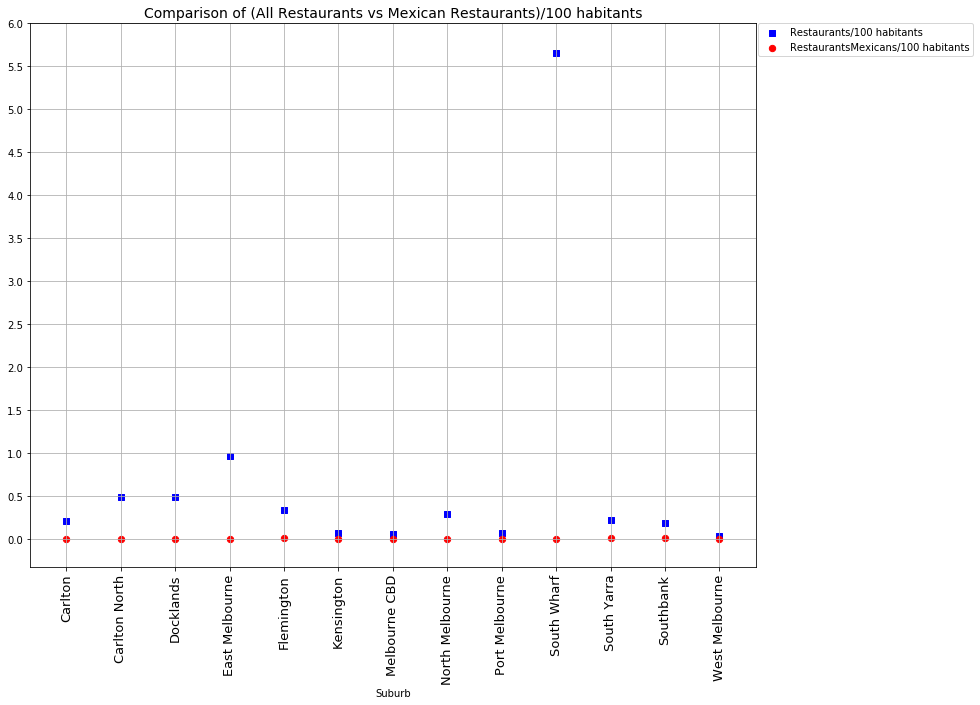

In [41]:
#Scatter plot of (All Restaurants vs Mexican Restaurants)/100 habitants

x = final['Suburb']
y1 = final['Restaurants/100 habitants']
y2= final['RestaurantsMexicans/100 habitants']
fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=40, c='b', marker="s", label='Restaurants/100 habitants')
ax1.scatter(x, y2, s=40, c='r', marker="o", label='RestaurantsMexicans/100 habitants')
ax1.set_xticklabels(x, rotation=90, fontsize=13)
ax1.grid(True)
plt.yticks(np.arange(0, max(y1)+.5, .5))
plt.title("Comparison of (All Restaurants vs Mexican Restaurants)/100 habitants", fontsize=14)
plt.xlabel("Suburb")

plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0);
plt.show()

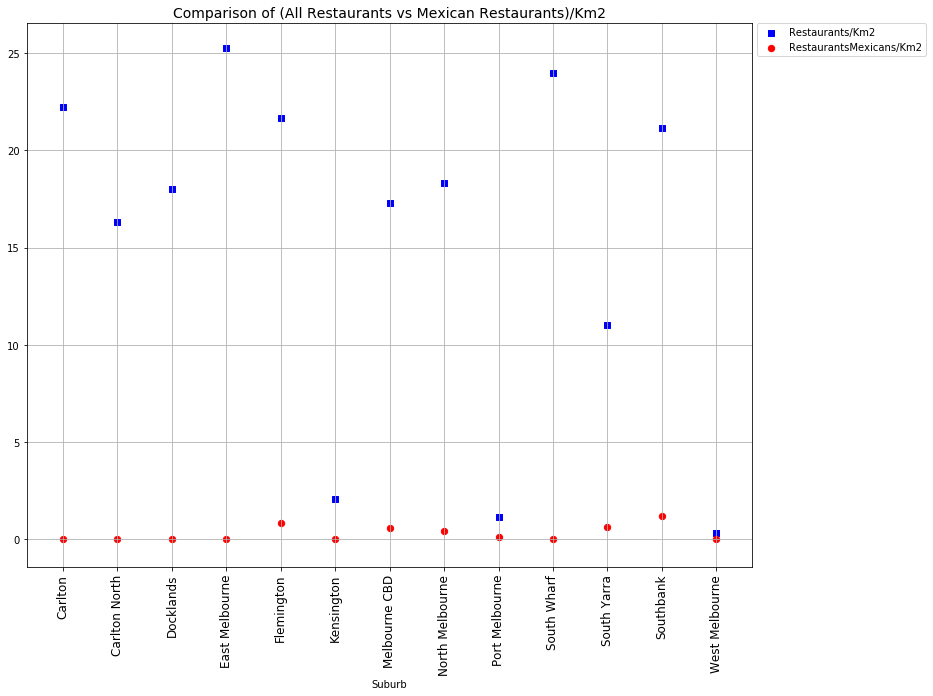

In [42]:
#Scatter plot of (All Restaurants vs Mexican Restaurants)/Km2

x = final['Suburb']
y1 = final['Restaurants/Km2']
y2= final['RestaurantsMexicans/Km2']
fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot()

ax1.scatter(x, y1, s=40, c='b', marker="s", label='Restaurants/Km2')
ax1.scatter(x, y2, s=40, c='r', marker="o", label='RestaurantsMexicans/Km2')
ax1.set_xticklabels(x, rotation=90, fontsize=12)
ax1.grid(True)
plt.title("Comparison of (All Restaurants vs Mexican Restaurants)/Km2", fontsize=14)
plt.xlabel("Suburb")

plt.legend(bbox_to_anchor=(1.24,1), borderaxespad=0);
plt.show()

In [242]:
#Add the population/km2 column

final['People/Km2']=final['Population']/restaurantStats['Area (Km2)']
final


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Suburb,Area (Km2),Count of Mexican Restaurants,Count of Restaurants,Population,Restaurants/100 habitants,Restaurants/Km2,RestaurantsMexicans/100 habitants,RestaurantsMexicans/Km2,People=/Km2,People/Km2
0,Carlton,1.80,0,39,18535,0.210413,21.666667,0.000000,0.000000,10297.222222,10297.222222
1,Carlton North,1.90,0,31,6300,0.492063,16.315789,0.000000,0.000000,3315.789474,3315.789474
2,Docklands,3.00,0,54,10964,0.492521,18.000000,0.000000,0.000000,3654.666667,3654.666667
3,East Melbourne,1.90,0,48,4964,0.966962,25.263158,0.000000,0.000000,2612.631579,2612.631579
4,Flemington,1.20,1,25,7719,0.323876,20.833333,0.012955,0.833333,6432.500000,6432.500000
5,Kensington,3.90,0,10,10812,0.092490,2.564103,0.000000,0.000000,2772.307692,2772.307692
6,Melbourne CBD,1.79,1,31,47285,0.065560,17.318436,0.002115,0.558659,26416.201117,26416.201117
7,North Melbourne,2.40,1,43,14940,0.287818,17.916667,0.006693,0.416667,6225.000000,6225.000000
8,Port Melbourne,9.70,1,11,16175,0.068006,1.134021,0.006182,0.103093,1667.525773,1667.525773
9,South Wharf,0.25,0,6,106,5.660377,24.000000,0.000000,0.000000,424.000000,424.000000


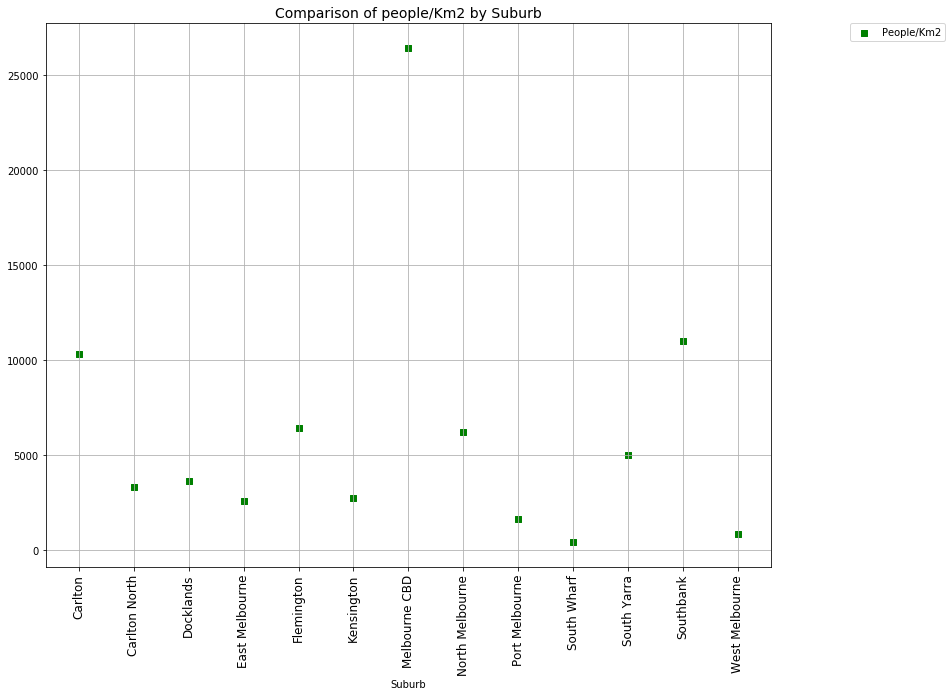

In [243]:
#Scatter plot of people/km2

x = final['Suburb']
y1 = final['People/Km2']
fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot()

ax1.scatter(x, y1, s=40, c='g', marker="s", label='People/Km2')
ax1.set_xticklabels(x, rotation=90, fontsize=12)
ax1.grid(True)
plt.title("Comparison of people/Km2 by Suburb", fontsize=14)
plt.xlabel("Suburb")

plt.legend(bbox_to_anchor=(1.24,1), borderaxespad=0);
plt.show()

In [73]:
#Second foursquare credentials to not exceed daily quota

CLIENT_ID2 = 'UPUJCM2K5P1NUGX0RZDY4WEV0E0LRLLQYHLCHMHAC2FDA3P1' # your Foursquare ID
CLIENT_SECRET2 = 'RLZPBH3HX3HI55LQE4OMCWYWMSTP1RTJBONTO4MA11SVTLL5' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID 2: ' + CLIENT_ID2)
print('CLIENT_SECRET 2:' + CLIENT_SECRET2)

Your credentails:
CLIENT_ID 2: UPUJCM2K5P1NUGX0RZDY4WEV0E0LRLLQYHLCHMHAC2FDA3P1
CLIENT_SECRET 2:RLZPBH3HX3HI55LQE4OMCWYWMSTP1RTJBONTO4MA11SVTLL5


In [67]:
#Obtain likes and ratings of Melbourne venues

def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID2, CLIENT_SECRET2, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

In [68]:
#Use the function to get the likes and ratings

MelbourneRestaurants_raitings = getVenueRaitings(melbourneRestaurants['VenueId'])
MelbourneRestaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4b0b8439f964a520053223e3,8.7,205.0
1,4b05874cf964a520dd8922e3,8.3,24.0
2,50f52847e4b0c40b56fa5110,8.2,87.0
3,4f541dc2e4b050039f73094c,8.7,60.0
4,4ba9fd41f964a520f4413ae3,8.0,22.0


In [69]:
#Get the database for just the Mexican restaurants

MexicanRatings = pd.merge(melbourneMexicanRestaurants, MelbourneRestaurants_raitings, how='left')
MexicanRatings

,Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory,VenueRating,VenueLikes
0,Flemington,La Tortillería,50e6949ee4b010cf8fac2a0a,-37.791415,144.935488,Mexican Restaurant,8.7,85.0
1,Melbourne CBD,Guzman y Gomez,507e1c68e4b04a2c7cc62bb9,-37.811168,144.964248,Mexican Restaurant,7.9,120.0
2,North Melbourne,El Sabor,5204b98a498ea5d6a6f4e5e0,-37.804980,144.949670,Mexican Restaurant,6.5,8.0
3,Port Melbourne,El Cielo,50cbea53e4b0bc9a5153b150,-37.826494,144.921390,Mexican Restaurant,NaN,NaN
4,Southbank,Paco y Lola,518c6473498e951b557f79d4,-37.831737,144.957081,Mexican Restaurant,7.9,30.0
5,Southbank,MadMex,53fafceb498e31b96ac65cdb,-37.832065,144.960197,Mexican Restaurant,7.5,11.0
6,South Yarra,Guzman Y Gomez,56b93973498e9571740f55d1,-37.839336,144.993387,Burrito Place,7.8,9.0
7,South Yarra,Zambrero,51049db1e4b01dd7f97b3bac,-37.846210,144.994460,Mexican Restaurant,7.4,12.0
8,South Yarra,Hecho En Mexico,589c0de101f077670ab8bd49,-37.843268,144.994899,Mexican Restaurant,6.9,4.0


In [70]:
#Get the whole data frame of all restaurant details

AllRestaurantRatings = pd.merge(melbourneRestaurants, MelbourneRestaurants_raitings, how='left')
AllRestaurantRatings

,Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory,VenueRating,VenueLikes
0,Carlton,D.O.C. Pizza & Mozzarella Bar,4b0b8439f964a520053223e3,-37.798954,144.968490,Pizza Place,8.7,205.0
1,Carlton,Shakahari,4b05874cf964a520dd8922e3,-37.798923,144.967830,Vegetarian / Vegan Restaurant,8.3,24.0
2,Carlton,D.O.C Espresso,50f52847e4b0c40b56fa5110,-37.799227,144.967240,Italian Restaurant,8.2,87.0
3,Carlton,Le Miel et la lune,4f541dc2e4b050039f73094c,-37.797014,144.966208,Café,8.7,60.0
4,Carlton,Donnini's Restaurant,4ba9fd41f964a520f4413ae3,-37.799490,144.967231,Italian Restaurant,8.0,22.0
...,...,...,...,...,...,...,...,...
386,South Yarra,Good Luck Seafood & BBQ Restaurant,4bd3b56377b29c74d6919182,-37.847945,144.993984,Chinese Restaurant,7.4,9.0
387,South Yarra,Bacash,4b05874ef964a520928a22e3,-37.834196,144.981970,Seafood Restaurant,7.2,6.0
388,South Yarra,mister zen,560741ea498e1ae1fab610a4,-37.845620,144.985840,Café,6.9,13.0
389,West Melbourne,Chef Lanka,4ebe45800e019a162a0c066e,-37.810973,144.920998,Asian Restaurant,NaN,NaN


In [79]:
#Formatting of NaN's

AllRestaurantRatings.dropna(inplace=True)
AllRestaurantRatings

,Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory,VenueRating,VenueLikes
0,Carlton,D.O.C. Pizza & Mozzarella Bar,4b0b8439f964a520053223e3,-37.798954,144.968490,Pizza Place,8.7,205.0
1,Carlton,Shakahari,4b05874cf964a520dd8922e3,-37.798923,144.967830,Vegetarian / Vegan Restaurant,8.3,24.0
2,Carlton,D.O.C Espresso,50f52847e4b0c40b56fa5110,-37.799227,144.967240,Italian Restaurant,8.2,87.0
3,Carlton,Le Miel et la lune,4f541dc2e4b050039f73094c,-37.797014,144.966208,Café,8.7,60.0
4,Carlton,Donnini's Restaurant,4ba9fd41f964a520f4413ae3,-37.799490,144.967231,Italian Restaurant,8.0,22.0
...,...,...,...,...,...,...,...,...
384,South Yarra,The Botanical,4ce9b4af595cb1f7ba32d014,-37.834042,144.981746,Australian Restaurant,7.3,57.0
385,South Yarra,Wagyu Ya,52c50d0b498efde7e6384074,-37.838943,144.991484,Japanese Restaurant,6.5,20.0
386,South Yarra,Good Luck Seafood & BBQ Restaurant,4bd3b56377b29c74d6919182,-37.847945,144.993984,Chinese Restaurant,7.4,9.0
387,South Yarra,Bacash,4b05874ef964a520928a22e3,-37.834196,144.981970,Seafood Restaurant,7.2,6.0


In [80]:
#Formating of the NaN's

MexicanRatings.dropna(inplace=True)
MexicanRatings

,Suburb,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory,VenueRating,VenueLikes
0,Flemington,La Tortillería,50e6949ee4b010cf8fac2a0a,-37.791415,144.935488,Mexican Restaurant,8.7,85.0
1,Melbourne CBD,Guzman y Gomez,507e1c68e4b04a2c7cc62bb9,-37.811168,144.964248,Mexican Restaurant,7.9,120.0
2,North Melbourne,El Sabor,5204b98a498ea5d6a6f4e5e0,-37.804980,144.949670,Mexican Restaurant,6.5,8.0
4,Southbank,Paco y Lola,518c6473498e951b557f79d4,-37.831737,144.957081,Mexican Restaurant,7.9,30.0
5,Southbank,MadMex,53fafceb498e31b96ac65cdb,-37.832065,144.960197,Mexican Restaurant,7.5,11.0
6,South Yarra,Guzman Y Gomez,56b93973498e9571740f55d1,-37.839336,144.993387,Burrito Place,7.8,9.0
7,South Yarra,Zambrero,51049db1e4b01dd7f97b3bac,-37.846210,144.994460,Mexican Restaurant,7.4,12.0
8,South Yarra,Hecho En Mexico,589c0de101f077670ab8bd49,-37.843268,144.994899,Mexican Restaurant,6.9,4.0


In [82]:
#Group suburb average rating of Mexican restaurants

SuburbMexican=MexicanRatings.groupby('Suburb',as_index=False).mean()[['Suburb','VenueRating']]
SuburbMexican.columns=['Suburb','Average Rating']
SuburbMexican.sort_values(['Average Rating'],ascending=False).head()

,Suburb,Average Rating
0,Flemington,8.700000
1,Melbourne CBD,7.900000
4,Southbank,7.700000
3,South Yarra,7.366667
2,North Melbourne,6.500000


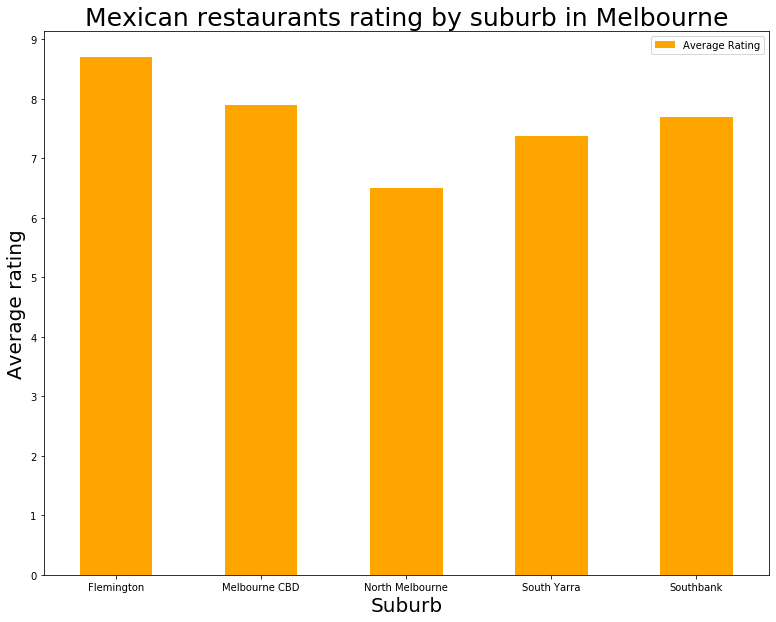

In [90]:
# Plot average rating of Mexican restaurants by suburb

SuburbMexican.plot.bar(x='Suburb', y='Average Rating', figsize=(13, 10), color=['orange'], rot=0)

plt.xlabel('Suburb', fontsize=20) # add to x-label to the plot
plt.ylabel('Average rating', fontsize=20) # add y-label to the plot
plt.title('Mexican restaurants rating by suburb in Melbourne', fontsize=25) # add title to the plot
plt.yticks(np.arange(0, 10, 1))

plt.show()

In [91]:
#Get average likes by suburb for Mexican restaurants

SuburbMexicanLikes=MexicanRatings.groupby('Suburb',as_index=False).mean()[['Suburb','VenueLikes']]
SuburbMexicanLikes.columns=['Suburb','Average Likes']
SuburbMexicanLikes.sort_values(['Average Likes'],ascending=False).head()

,Suburb,Average Likes
1,Melbourne CBD,120.000000
0,Flemington,85.000000
4,Southbank,20.500000
3,South Yarra,8.333333
2,North Melbourne,8.000000


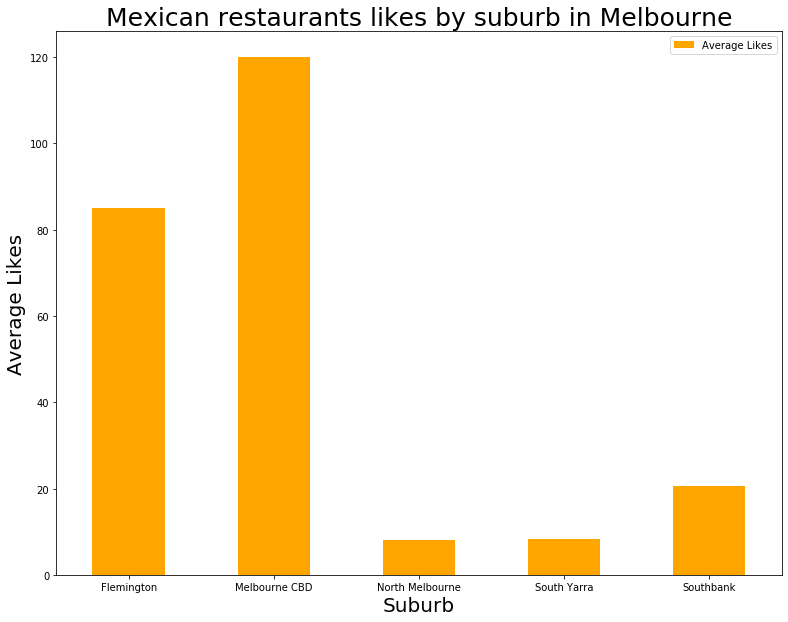

In [94]:
# Plot the likes of Mexican restaurants by suburb

SuburbMexicanLikes.plot.bar(x='Suburb', y='Average Likes', figsize=(13, 10), color=['orange'], rot=0)

plt.xlabel('Suburb', fontsize=20) # add to x-label to the plot
plt.ylabel('Average Likes', fontsize=20) # add y-label to the plot
plt.title('Mexican restaurants likes by suburb in Melbourne', fontsize=25) # add title to the plot


plt.show()

In [117]:
#Recall coordinates

SuburbMexicanCoordinates = pd.merge(SuburbMexican, df, how='left')
SuburbMexicanCoordinates

,Suburb,Average Rating,Population,Area (Km2),Latitude,Longitude
0,Flemington,8.700000,7719,1.20,-37.785000,144.928000
1,Melbourne CBD,7.900000,47285,1.79,-37.814000,144.963000
2,North Melbourne,6.500000,14940,2.40,-37.799167,144.946667
3,South Yarra,7.366667,25147,5.00,-37.840000,144.989000
4,Southbank,7.700000,18709,1.70,-37.829000,144.957000


In [156]:
#Bubble chart with street light display of Mexican restaurants ratings by suburb

print("The average rating of Mexican restaurants by suburb:")
m = folium.Map([-37.81,144.95],zoom_start=12.5)

for index, row in SuburbMexicanCoordinates.iterrows():
    if row['Average Rating'] >= 8.5:
        marker_color = 'green'
        fill_color = 'green'
    elif row['Average Rating'] >= 7.5:
        marker_color = 'orange'
        fill_color = 'orange'
    elif row['Average Rating'] >= 6.5:
        marker_color = 'red'
        fill_color = 'red'
    else:
        marker_color='darkred'
        fill_color = 'darkpurple'
    
    folium.Circle([row['Latitude'], row['Longitude']],
                        popup= 'Average rating of Mexican Restaurants in ' +str(row['Suburb']) + ': ' +str(row['Average Rating']),
                        tooltip=row['Suburb'],
                        radius=row['Average Rating']*110,
                        color=marker_color,
                        fill=True,
                        fill_color=fill_color).add_to(m)

m

The average rating of mexican restaurants by suburb:


In [157]:
#Recall coordinates

SuburbLocMexicanLikes = pd.merge(SuburbMexicanLikes, df, how='left')
SuburbLocMexicanLikes

,Suburb,Average Likes,Population,Area (Km2),Latitude,Longitude
0,Flemington,85.000000,7719,1.20,-37.785000,144.928000
1,Melbourne CBD,120.000000,47285,1.79,-37.814000,144.963000
2,North Melbourne,8.000000,14940,2.40,-37.799167,144.946667
3,South Yarra,8.333333,25147,5.00,-37.840000,144.989000
4,Southbank,20.500000,18709,1.70,-37.829000,144.957000


In [167]:
#Bubble chart with street light display of Mexican restaurants likes by suburb

print("The average likes of mexican restaurants by suburb:")
m = folium.Map([-37.81,144.95],zoom_start=12.5)

for index, row in SuburbLocMexicanLikes.iterrows():
    if row['Average Likes'] >= 120:
        marker_color = 'green'
        fill_color = 'green'
    elif row['Average Likes'] >= 85:
        marker_color = 'orange'
        fill_color = 'orange'
    elif row['Average Likes'] >= 8:
        marker_color = 'red'
        fill_color = 'red'
    else:
        marker_color='darkred'
        fill_color = 'darkpurple'
    
    folium.Circle([row['Latitude'], row['Longitude']],
                        popup= 'Average Likes of Mexican Restaurants in ' +str(row['Suburb']) + ': ' +str(row['Average Likes']),
                        tooltip=row['Suburb'],
                        radius=row['Average Likes']*6,
                        color=marker_color,
                        fill=True,
                        fill_color=fill_color).add_to(m)

m

The average likes of mexican restaurants by suburb:
